In [13]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

from tensorflow.keras.models import load_model

from plot_keras_history import plot_history

In [14]:
df = pd.read_csv('Dataset.csv')
df.head()

,Unnamed: 0,over,ball,total_runs,wicket left,runs required,winner,season
0,0,1,1,1,10.0,206.0,0.0,2017
1,1,1,2,1,10.0,206.0,0.0,2017
2,2,1,3,1,10.0,206.0,0.0,2017
3,3,1,4,3,10.0,204.0,0.0,2017
4,4,1,5,7,10.0,200.0,0.0,2017


In [16]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [17]:
df.head()

,over,ball,total_runs,wicket left,runs required,winner,season
0,1,1,1,10.0,206.0,0.0,2017
1,1,2,1,10.0,206.0,0.0,2017
2,1,3,1,10.0,206.0,0.0,2017
3,1,4,3,10.0,204.0,0.0,2017
4,1,5,7,10.0,200.0,0.0,2017


In [18]:
def create_dataset(dataset,time_stamp=6):
    X,Y = [],[]
    for i in range(len(dataset)-time_stamp-1):
        a = dataset[i:(i+time_stamp),:-1]
        X.append(a)
        Y.append(dataset[i+time_stamp,-1])
    return np.array(X), np.array(Y)

In [19]:
train_df = df[df['season']<=2017]
test_df = df[df['season']>2017]

In [20]:
train_df.drop(['season'],axis=1,inplace=True)
test_df.drop(['season'],axis=1,inplace=True)

c:\users\hp\anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
stamp=6
x_train, y_train = create_dataset(train_df.values, time_stamp=stamp)

x_test, y_test = create_dataset(test_df.values, time_stamp=stamp)

In [22]:
x_train.shape

(70482, 6, 5)

Epoch 1/10
2203/2203 [==============================] - 39s 18ms/step - loss: 0.4880 - accuracy: 0.7560 - val_loss: 0.5195 - val_accuracy: 0.7220
Epoch 2/10
2203/2203 [==============================] - 41s 19ms/step - loss: 0.4599 - accuracy: 0.7746 - val_loss: 0.5252 - val_accuracy: 0.6941
Epoch 3/10
2203/2203 [==============================] - 27s 12ms/step - loss: 0.4555 - accuracy: 0.7767 - val_loss: 0.5566 - val_accuracy: 0.6994
Epoch 4/10
2203/2203 [==============================] - 29s 13ms/step - loss: 0.4516 - accuracy: 0.7781 - val_loss: 0.5760 - val_accuracy: 0.6973
Epoch 5/10
2203/2203 [==============================] - 30s 14ms/step - loss: 0.4492 - accuracy: 0.7806 - val_loss: 0.5653 - val_accuracy: 0.7054
Epoch 6/10
2203/2203 [==============================] - 29s 13ms/step - loss: 0.4476 - accuracy: 0.7798 - val_loss: 0.5253 - val_accuracy: 0.7198
Epoch 7/10
2203/2203 [==============================] - 29s 13ms/step - loss: 0.4469 - accuracy: 0.7796 - val_loss: 0.5120 -

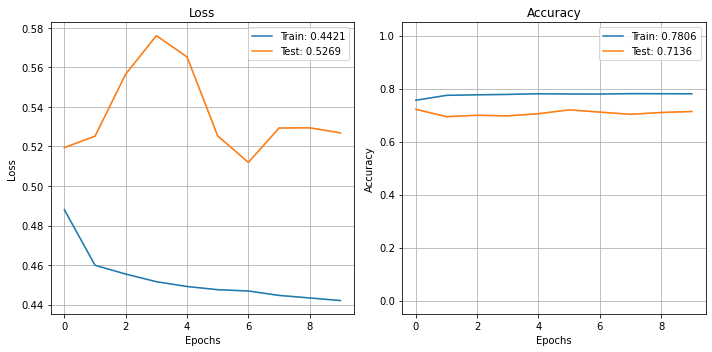

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(6,5)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test)).history
plot_history(history)

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

In [25]:
model.save('ipl.h5')